# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №4: Линейные модели, введение в конкурсную задачу


###### <hr\>
**Общая информация**

**Срок сдачи:** 17 апреля 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 17 апреля, -4 балла после 06:00 24 апреля, -6 баллов после 06:00 1 мая

Имеется ввиду именно сдача данного ДЗ, а не конечного результата по конкурсу (см ниже).<br\>
Жесткий дедлайн по конкурсной задаче - 14 мая 23:59 GMT.

При отправлении ДЗ указывайте фамилию в названии файла<br\>

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

# Определям, что вам досталось

<center><img src='https://static1.squarespace.com/static/571a6e39b6aa608067028725/t/577988518419c2d62fb5922f/1467582555915/'></center>

Укажите свою фамилию на русском языке в поле ниже.

In [2]:
USER_NAME = u'Галицкий'.lower()
REGULARIZATIONS = ["L1", "L2"]
ALGORITHM = ["", "Mini Batch"]

print "Имплементируйте обучение логистической регрессии с %s регуляризацией с помощью метода %s Stochastic Gradient Descent (SGD)"\
% (
    REGULARIZATIONS[hash(USER_NAME) % 2],
    ALGORITHM[hash(USER_NAME[::-1]) % 2]
)

Имплементируйте обучение логистической регрессии с L2 регуляризацией с помощью метода Mini Batch Stochastic Gradient Descent (SGD)


#### Замечания
* В SGD градиент расчитывается по одному случайному объекту
* В Mini Batch SGD - по подвыборке объектов т.е в алгоритме надо
    * Перемешать выборку
    * Разбить на части (примерно) одинакового размера - мини батчи
    * Считать градиент по мини батчам
* Сделайте убывающую скорость спуска, например `alpha/n_epoch` или `alpha/n_iter` или `alpha/n_batch` или ...
* Для отладки работы алгоритма, реализуйте возможность сохранения или вывода ошибки модели после очередной итерации/батча/эпохи.
* Правило останова - максимальное количество эпох
    
Эпохой в SGD и MB-SGD называется один проход по **всем** объектам в выборке (тем или иным способом)

# Реализация модели

## Имплементация (6 баллов)

In [8]:
from sklearn.base import BaseEstimator, ClassifierMixin


def sigmoid(x):

    return 1.0 / (1 + np.exp(-x))

def next_batch(X, y, batchSize):
    # loop over our dataset `X` in mini-batches of size `batchSize`
    for i in np.arange(0, X.shape[0], batchSize):
    # yield a tuple of the current batched data and labels
        yield (X[i:i + batchSize], y[i:i + batchSize])


class MySGDClassifier(BaseEstimator, ClassifierMixin):
    """
    Предполагается, что в выборке всегда 2 класса
    """
    
    def __init__(self, C= 20 , alpha= 0.4, max_epoch= 100):
        """
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        """
        
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        
    
    def fit(self, X, y=None):
        '''
        Обучение модели
        '''
        
        
        X1 = np.c_[np.ones((X.shape[0])), X]
        W = np.random.uniform(size=(X1.shape[1],))
        #W = np.zeros((X1.shape[1],))
        lossHistory = []

        
        for epoch in np.arange(0, self.max_epoch):
            
            epochLoss = []

            print epoch
            for (batchX, batchY) in next_batch(X1, y, 10):
                  
                preds = sigmoid(batchX.dot(W))
                
                error = preds - batchY
                
                loss = np.sum(error ** 2)
                epochLoss.append(loss)

                L2 = (1/self.C)*2*W
               
                gradient = batchX.T.dot(error) / batchX.shape[0] +  L2
                
                W += - self.alpha/(epoch+1)* gradient
                
            
            lossHistory.append(np.average(epochLoss))
           
        
        return X1 ,W , lossHistory
    
    def partial_fit(self, X, y=None):
        '''
        По желанию - метод дообучения модели на новых данных
        '''
    
        return self
        
    def predict(self, X):
        '''
        Возвращение метки класса
        '''
        X_hat = np.c_[np.ones((X.shape[0])), X]
        X_q = sigmoid(X_hat.dot(W))
        
        y_hat = np.where(X_q >= 0.5,1,0)
        return y_hat
    
    def predict_proba(self, X):
        '''
        Возвращение вероятности каждого из классов
        '''
        
        X_hat = np.c_[np.ones((X.shape[0])), X]
        
        
        return sigmoid(X_hat.dot(W))

## Проверка на синтетических данных (2 балл)

Запустите ваш алгоритм на синтетических данных. 
Выведите полученные веса и нарисуйте разделяющую границу между классами.

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


(-4.5792962388690981, 1.6761418633126515)

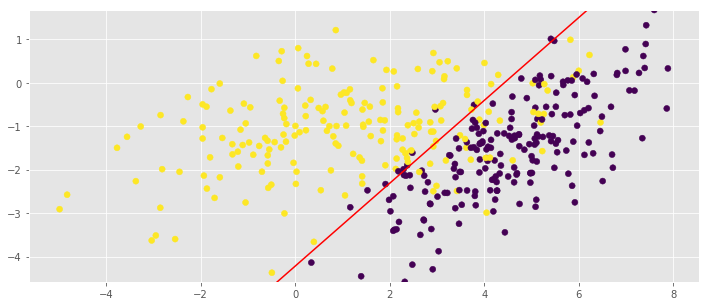

In [9]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])

y = np.r_[np.zeros(200), np.ones(200)]


shuffle_indices = np.random.permutation(np.arange(X.shape[0]))

    
X = X[shuffle_indices]
y= y[shuffle_indices]

plt.scatter(X[:,0], X[:,1], c=y)

method = MySGDClassifier()
A,W,q = method.fit(X,y)

x_0 = np.sort(A[:,1])
Y = (-W[0] - (W[1] * x_0) / W[2])

plt.plot(x_0,Y, "r-")
plt.ylim(X[:,1].min(),X[:,1].max())
#print method.predict(X)

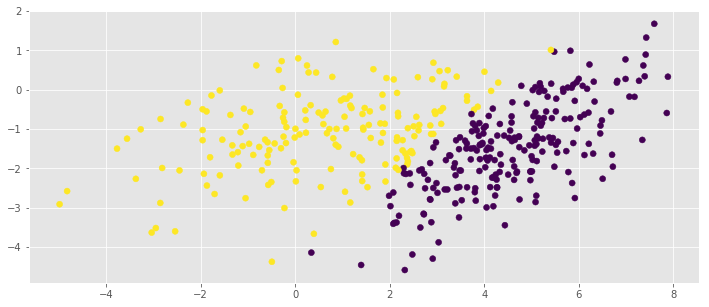

In [12]:

Y_hat = method.predict(X)
plt.scatter(X[:,0], X[:,1], c=Y_hat)

In [13]:
print np.sum(Y_hat == y)

from sklearn import linear_model
logreg = linear_model.LogisticRegression()
logreg.fit(X, y)
print np.sum(y == logreg.predict(X))

357
358


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


(-11.457662205931356, 10.720331653901615)

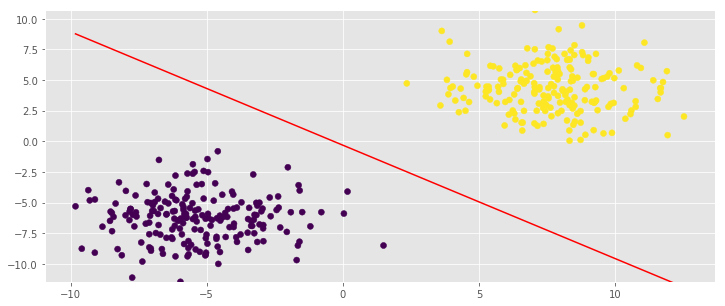

In [14]:
from sklearn.datasets.samples_generator import make_blobs
(X, y) = make_blobs(n_samples=400, n_features=2, centers=2, cluster_std=2, random_state=95)
plt.figure()
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

method = MySGDClassifier()
A,W,q = method.fit(X,y)

x_0 = np.sort(A[:,1])
Y = (-W[0] - (W[1] * x_0) / W[2])

plt.plot(x_0,Y, "r-")
plt.ylim(X[:,1].min(),X[:,1].max())

## Анализ сходимости (2 балл)

Покажите сходимость вашего метода: изобразите графики зависимости значения функции потерь (по всей выборке) после очередной итерации/батча/эпохи (выбрать одно) для разных `alpha`.

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46

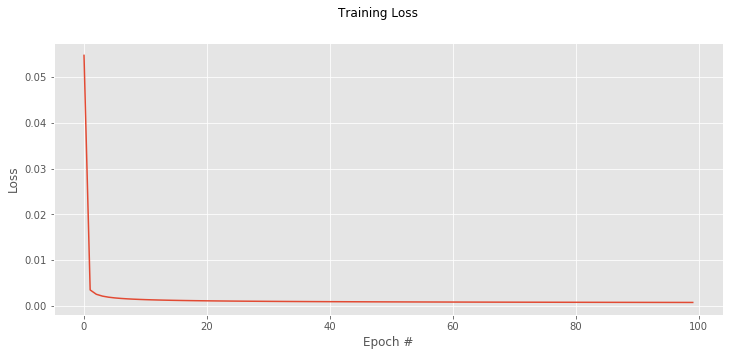

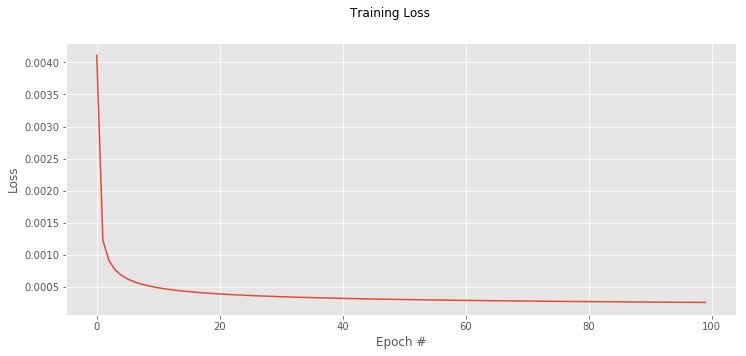

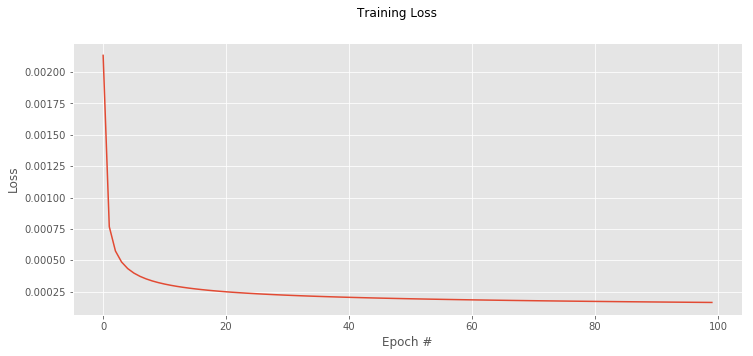

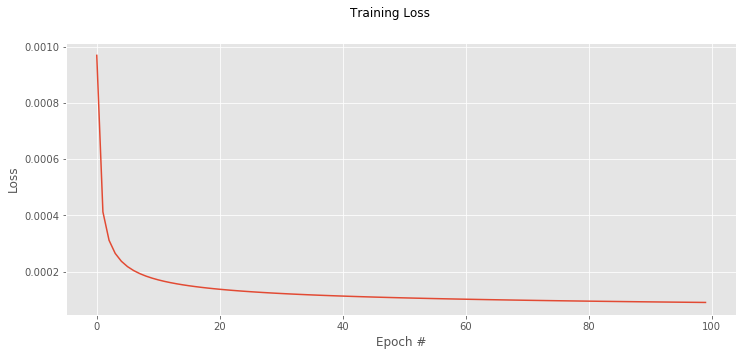

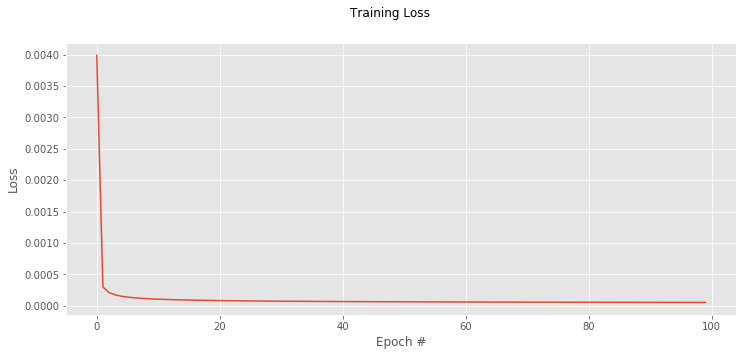

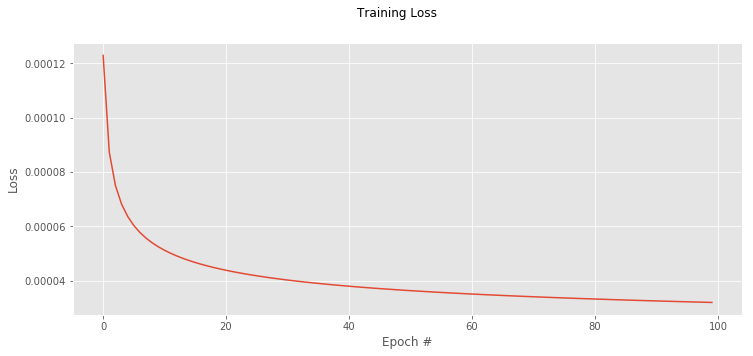

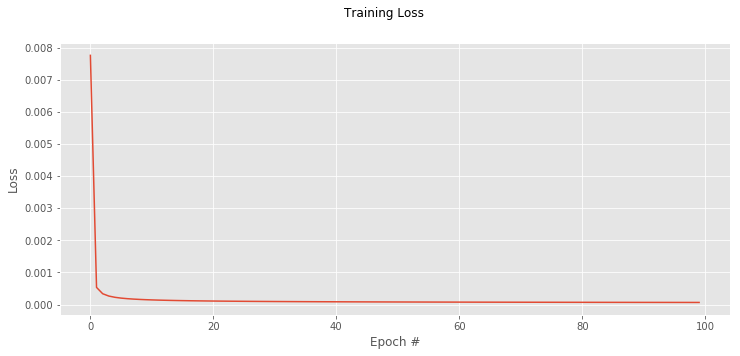

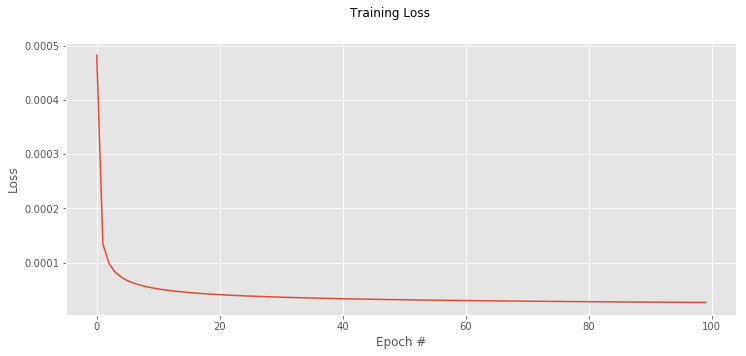

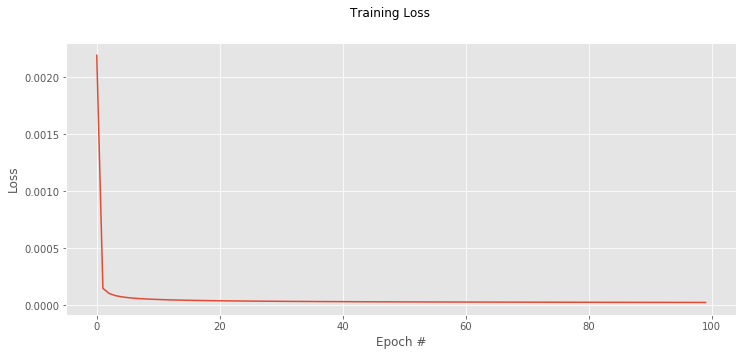

In [15]:
for alph in np.arange(0.1,1,0.1):
    
    method = MySGDClassifier(alpha= alph)
    A, W, loss = method.fit(X,y)
    fig = plt.figure()
    plt.plot(np.arange(0, 100), loss)
    fig.suptitle("Training Loss")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss")
    


# Введение в конкурсную задачу

## О hearthstone

[Hearthstone](http://eu.battle.net/hearthstone/ru/) - карточная он-лайн игра по мотивам вселенной Warcraft.

Каждый игрок играет за персонажа определенного класса и собирает колоду карт которую может разыгрывать во время игры. Для дальнейших деталей обратитесь к [wiki](https://ru.wikipedia.org/wiki/Hearthstone), посмотрите youtube или поиграйте сами (но не долго =) ).

Теми или иными способами игрок может отнимать жизни у своего оппонента, таким образом цель раунда - побить другого игрока.

<center><img src='http://ps3hits.ru/wp-content/uploads/2015/08/hearthstone-game-sshot-1.jpg'></center>

## Постановка задачи

В рамках конференции [AAIA 17](https://fedcsis.org/2017/aaia) было запущено [соревнование](https://knowledgepit.fedcsis.org/contest/view.php?id=120) по предсказанию исхода раунда в heartstone. 

Используя признаки, которые описывают текущее состояние раунда необходимо предсказать **вероятность** победы игрока в этом раунде.

Качество модели измеряется с помощью **ROC-AUC**

### Правила
* Объединяться в команды по правилам конкурса можно, но по правилам нашего курса - нельзя)
* Вы можете использовать любой алгоритм, даже неизученный в нашем курсе (если на защите сможете объяснить как он работает)
* Имейте ввиду, что вы должны отправить результаты строго до 14 мая 23:59 GMT на сайт соревнования (раздел submission). Без результата в leaderboard оценка выставлена не будет.

## Данные

Для того, чтобы получить данные необходимо зарегистрироваться на сайте соревнования. 

Данные содержат набор информации о раунде в некоторый момент времени: жизни игрока и оппонента, номер хода, карты на столе, карты в руке игрока, количество карт в руке оппонента и тп.<br/>
По игроку №1 (далее просто **игрок**) помимо всего прочего известен набор карт "в руке".</br>
По игроку №2 (далее просто **оппонент**) эта информация отсутствует.</br>


Данные поставляются в двух форматах:
* В формате json содержится полная информация по текущему состоянию раунда
* В табличном формате упрощенная аггрерированная информация по текущему состоянию раунда

В данных для обучению содержится 2 млн. игр, разбитых на 4 файла. Названия признаков говорят сами за себя.
Целевой признак - `decision` (1 - победил игрок, 0 - победил оппонент).

## Работа с простыми табличными данными (1 балл)

По соображениям сокращения времени вычислений, проделаем основные шаги по одной части данных.

Если данные не будут помещаться вам с оперативную память, рекомендуется совершить предобработку в python, а  моделирование выполнять с помощью [vowpal wabbit](https://github.com/JohnLangford/vowpal_wabbit).

In [56]:
# Загрузка данных целиком
# df_list = []
# for chunk in range(1,5):
#     filepath = './trainingData_tabular_chunk%d.csv' % chunk
#     df_list.append(pd.read_csv(filepath, sep=','))

# df_data = pd.concat(df_list)

# Загрузка одной части данных
filepath = './trainingData_tabular_chunk1.csv'
df_data = pd.read_csv(filepath, sep=',')

In [57]:
df_data.shape

(500000, 45)

In [58]:
# для удобства
df_data.columns = df_data.columns.str.replace('.', '_')
df_data = df_data.set_index('gamestate_id')

In [59]:
df_data.head().T

gamestate_id,4687346,3270826,3189487,4098946,2661127
decision,1,1,1,1,0
turn,14,7,5,8,13
opponent_armor,0,0,3,0,0
opponent_attack,0,0,0,0,0
opponent_hero_card_id,798,754,612,390,25
opponent_hp,5,22,29,26,30
opponent_special_skill_used,0,0,0,0,0
opponent_weapon_durability,0,0,0,0,0
opponent_crystals_all,10,6,4,7,10
opponent_crystals_current,10,6,1,7,1


In [60]:
# Распределение классов
df_data.decision.mean()

# Примерно поровну

0.504702

#### Задание

* Определите количество уникальных карт героя у игрока и оппонента.
* Преобразуйте категориальные переменные с помощьб one-hot кодирования, добавьте к датасету и удалите прежние столбцы

In [61]:
## Youd Code Here
for name in df_data.columns:
    s = ''
    s +=  name
    if (df_data[name].nunique()<=20):
        print s, df_data[name].nunique()

decision 2
opponent_attack 6
opponent_hero_card_id 9
opponent_special_skill_used 2
opponent_weapon_durability 5
opponent_crystals_all 11
opponent_crystals_current 11
opponent_fatigue_damage 7
opponent_hand_count 11
opponent_played_minions_count 8
player_armor 20
player_attack 8
player_hero_card_id 9
player_special_skill_used 2
player_weapon_durability 5
player_crystals_all 10
player_crystals_current 11
player_fatigue_damage 6
player_hand_count 11
player_played_minions_count 8
opponent_played_nOfCards 8
player_played_nOfCards 8
player_hand_nOfMinions 11
player_hand_nOfSpells 8
player_hand_nOfWeapons 5
player_hand_nOfCards 11
player_hand_nOfPlayable 11


In [62]:
from sklearn.preprocessing import OneHotEncoder


ohe = OneHotEncoder(sparse = False)
new_ohe_features = ohe.fit_transform(df_data.opponent_hero_card_id.values.reshape(-1,1))
tmp = pd.DataFrame(new_ohe_features,columns = ['opponent_hero_card_id =' + str(b) for b in df_data.opponent_hero_card_id.value_counts().keys()])
tmp.index = df_data.index

df_data = pd.concat([df_data, tmp], axis=1)

ohe = OneHotEncoder(sparse = False)
new_ohe_features = ohe.fit_transform(df_data.player_hero_card_id.values.reshape(-1,1))
tmp = pd.DataFrame(new_ohe_features,columns = ['player_hero_card_id =' + str(b) for b in df_data.player_hero_card_id.value_counts().keys()])
tmp.index = df_data.index

df_data = pd.concat([df_data, tmp], axis=1)

del df_data['opponent_hero_card_id']
del df_data['player_hero_card_id']
print df_data.shape


df_data.head().T

(500000, 60)


gamestate_id,4687346,3270826,3189487,4098946,2661127
decision,1.0,1.0,1.0,1.0,0.0
turn,14.0,7.0,5.0,8.0,13.0
opponent_armor,0.0,0.0,3.0,0.0,0.0
opponent_attack,0.0,0.0,0.0,0.0,0.0
opponent_hp,5.0,22.0,29.0,26.0,30.0
opponent_special_skill_used,0.0,0.0,0.0,0.0,0.0
opponent_weapon_durability,0.0,0.0,0.0,0.0,0.0
opponent_crystals_all,10.0,6.0,4.0,7.0,10.0
opponent_crystals_current,10.0,6.0,1.0,7.0,1.0
opponent_deck_count,11.0,19.0,22.0,17.0,12.0


## Обучение модели (1 балл)

#### Задание

* Получите матрицу объект признак `X` и вектор целевого признака `y`
* Обучите модуль из первой части этого ДЗ на данных

In [63]:
## Youd Code Here

Q = df_data.values
y1 = Q[:,0]

Q = Q[:,1:]
print Q.shape

(500000, 59)


In [64]:
method1 = MySGDClassifier()
A,W,q = method1.fit(Q,y1)



0


/Users/igor/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: overflow encountered in exp


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


(500000, 60)


In [65]:
filepath = './testData_tabular.csv'
df_data1 = pd.read_csv(filepath, sep=',')
df_data1.columns = df_data1.columns.str.replace('.', '_')
df_data1 = df_data1.set_index('gamestate_id')


from sklearn.preprocessing import OneHotEncoder


ohe = OneHotEncoder(sparse = False)
new_ohe_features = ohe.fit_transform(df_data1.opponent_hero_card_id.values.reshape(-1,1))
tmp = pd.DataFrame(new_ohe_features,columns = ['opponent_hero_card_id =' + str(b) for b in df_data1.opponent_hero_card_id.value_counts().keys()])
tmp.index = df_data1.index

df_data1 = pd.concat([df_data1, tmp], axis=1)

ohe = OneHotEncoder(sparse = False)
new_ohe_features = ohe.fit_transform(df_data1.player_hero_card_id.values.reshape(-1,1))
tmp = pd.DataFrame(new_ohe_features,columns = ['player_hero_card_id =' + str(b) for b in df_data1.player_hero_card_id.value_counts().keys()])
tmp.index = df_data1.index

df_data1 = pd.concat([df_data1, tmp], axis=1)

del df_data1['opponent_hero_card_id']
del df_data1['player_hero_card_id']


X_test = df_data1.values[:,1:]
print X_test.shape

Y_hat1 = method1.predict_proba(X_test)

print Y_hat1

(750000, 59)
[ 0.  0.  0. ...,  0.  0.  0.]


/Users/igor/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: overflow encountered in exp


In [55]:
np.savetxt('test1.txt', Y_hat1)

0.0

## Применение модели (3 балла)
#### Задание
* Загрузите тестовые данные
* Выполните те же операции с датасетом, что и с обучающей выборкой
* Примените модель и загрузите решение на страницу конкурса
* Напечатайте ваш ник и оценку качества, полученную после загрузки

Судя по описанию, submission file должен состоять из одного столбца с числами, соответствующим вероятностям победы игрока.

In [ ]:
0.7701 